In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
# Inspect the datasets
print("Customers Data:\n", customers.head())
print("\nProducts Data:\n", products.head())
print("\nTransactions Data:\n", transactions.head())

Customers Data:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C01

In [5]:
# Check for null values and duplicates in each dataset
print("\nNull values in Customers:\n", customers.isnull().sum())
print("\nNull values in Products:\n", products.isnull().sum())
print("\nNull values in Transactions:\n", transactions.isnull().sum())

print("\nDuplicate rows in Customers:", customers.duplicated().sum())
print("Duplicate rows in Products:", products.duplicated().sum())
print("Duplicate rows in Transactions:", transactions.duplicated().sum())



Null values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Null values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Null values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate rows in Customers: 0
Duplicate rows in Products: 0
Duplicate rows in Transactions: 0


In [6]:
# Summary statistics for numerical columns
print("\nSummary of Transactions:\n", transactions.describe())


Summary of Transactions:
           Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


/var/folders/7_/fmcj7bps2kd8cq3np8pb70500000gn/T/ipykernel_16066/2726098164.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


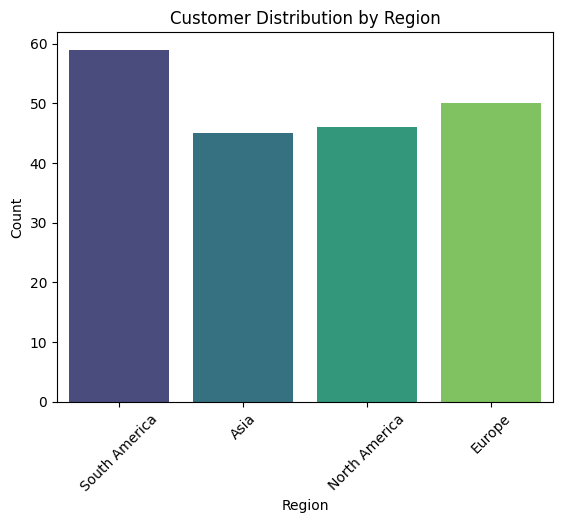

In [7]:
# Visualizations
# 1. Customer distribution by region
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/7_/fmcj7bps2kd8cq3np8pb70500000gn/T/ipykernel_16066/472988160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, y='Category', palette='plasma')


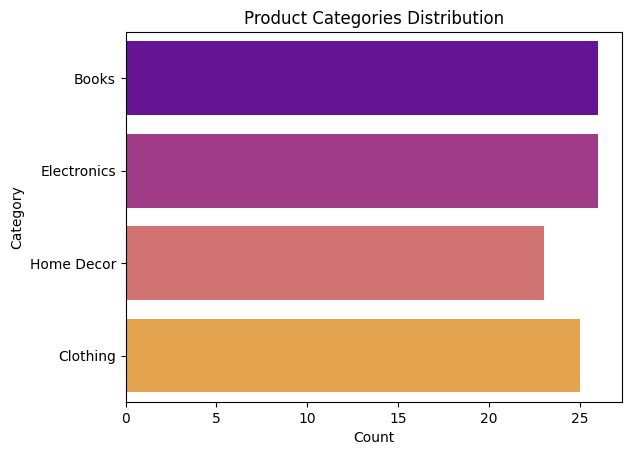

In [8]:
# 2. Product categories distribution
sns.countplot(data=products, y='Category', palette='plasma')
plt.title('Product Categories Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

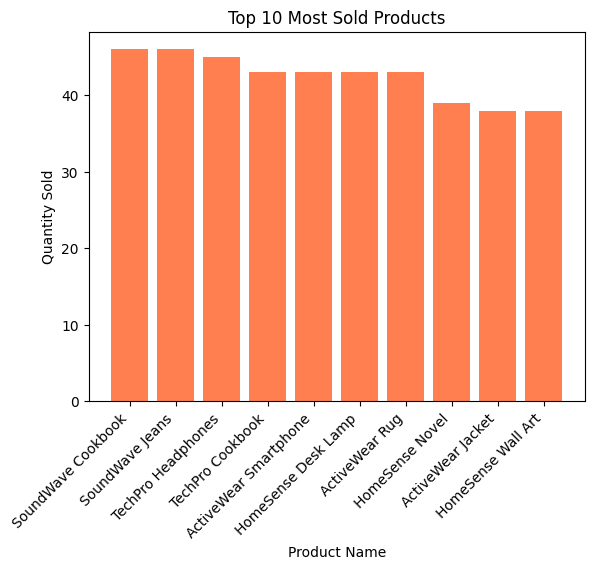

In [9]:
# 3. Top 10 most sold products
top_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(10)
top_products = top_products.reset_index().merge(products, on='ProductID')
plt.bar(top_products['ProductName'], top_products['Quantity'], color='coral')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
# Merging transactions with product details
transactions_with_products = transactions.merge(products, on='ProductID')

# Calculating revenue contribution by product
revenue_by_product = transactions_with_products.groupby('ProductName')['TotalValue'].sum()

# Identifying the top 3 best-selling products by revenue
top_3_products = revenue_by_product.nlargest(3)

# Calculating their total revenue contribution
top_3_revenue = top_3_products.sum()

# Calculating the percentage contribution of the top 3 products to the total revenue
x_percentage = (top_3_revenue / total_annual_revenue) * 100

top_3_products.index.tolist(), x_percentage


(['ActiveWear Smartwatch', 'SoundWave Headphones', 'SoundWave Novel'],
 12.87204079979877)

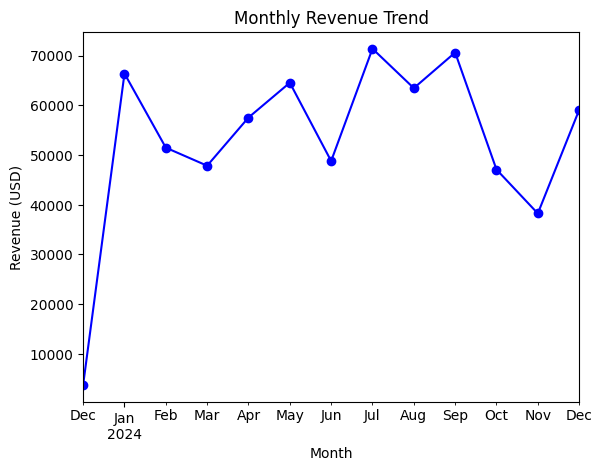

In [10]:
# 4. Monthly revenue trend
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_revenue = transactions.groupby('Month')['TotalValue'].sum()
monthly_revenue.plot(kind='line', marker='o', title='Monthly Revenue Trend', color='blue')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.show()

In [19]:
# Extracting the month from the transaction date for analysis
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.month

# Calculating monthly revenue
monthly_revenue = transactions.groupby('Month')['TotalValue'].sum()

# Total annual revenue
total_annual_revenue = monthly_revenue.sum()

# Finding the top two months with the highest revenue
top_months = monthly_revenue.nlargest(2)

# Calculating their percentage contribution to the total revenue
top_month_percentage = (top_months.sum() / total_annual_revenue) * 100

month1, month2 = top_months.index
month1_revenue, month2_revenue = top_months.values

month1, month2, top_month_percentage


(7, 9, 20.575515007661792)

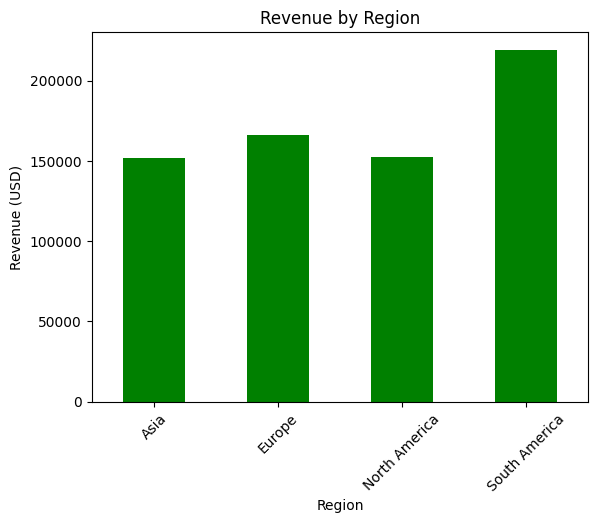

In [11]:
# 5. Revenue by region
merged_data = transactions.merge(customers, on='CustomerID')
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum()
revenue_by_region.plot(kind='bar', title='Revenue by Region', color='green')
plt.xlabel('Region')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

In [18]:
merged_data = transactions.merge(customers, on='CustomerID')

# Calculating revenue contribution by region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum()

# Total revenue to calculate percentages
total_revenue = revenue_by_region.sum()

# Finding the region with the highest and lowest revenue contribution
region_x = revenue_by_region.idxmax()  # Region with highest revenue
region_y = revenue_by_region.idxmin()  # Region with lowest revenue

# Calculating their respective revenue percentages
x_percentage = (revenue_by_region[region_x] / total_revenue) * 100
y_percentage = (revenue_by_region[region_y] / total_revenue) * 100

region_x, x_percentage, region_y, y_percentage

('South America', 31.7904306514668, 'Asia', 22.039992547198416)

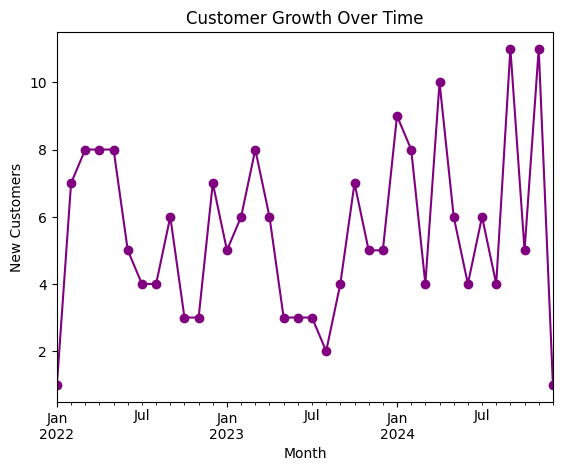

In [15]:
# 6. New customer sign-ups over time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
customer_growth = customers.groupby('SignupMonth').size()
customer_growth.plot(kind='line', marker='o', title='Customer Growth Over Time', color='purple')
plt.xlabel('Month')
plt.ylabel('New Customers')
plt.show()

In [21]:
# Extracting the month from the signup date for analysis
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupMonth'] = customers['SignupDate'].dt.month

# Counting new customer sign-ups by month
signup_counts = customers['SignupMonth'].value_counts()

# Identifying the top 2 months with the highest number of sign-ups
top_signup_months = signup_counts.nlargest(2)

# Extracting the months and their respective counts
month1, month2 = top_signup_months.index
count1, count2 = top_signup_months.values

month1, month2, count1, count2


(4, 2, 24, 21)

In [17]:
# 7. Repeat customers and their revenue contribution
repeat_customers = merged_data.groupby('CustomerID')['TransactionID'].count().reset_index()
repeat_customers = repeat_customers[repeat_customers['TransactionID'] > 1]
repeat_revenue = merged_data[merged_data['CustomerID'].isin(repeat_customers['CustomerID'])]['TotalValue'].sum()
total_revenue = merged_data['TotalValue'].sum()
repeat_revenue_percentage = (repeat_revenue / total_revenue) * 100
print(f"Repeat customers contribute {repeat_revenue_percentage:.2f}% of total revenue.")

Repeat customers contribute 99.08% of total revenue.
